<a href="https://colab.research.google.com/github/zaaraquadrii/Zaara_Projects_Labs/blob/main/Module_2_Lab_1_Manifold_Learning_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [6]:
n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)

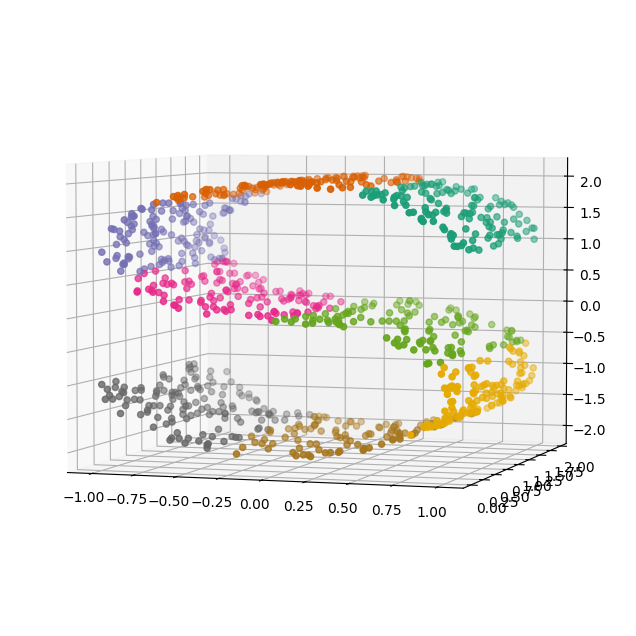

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Dark2)
ax.view_init(4, -72)

### Step 1a: First lets compute the distance matrix (pairwise Euclidean distances) from the data

In [8]:
def dist(a, b):
  '''Computes Euclidean distance between 2 points'''
  return np.sqrt(sum((a - b) ** 2))

distances = np.array([[dist(p1, p2) for p2 in X] for p1 in X])
print(distances.shape)

(1000, 1000)


### Step 1b: Let us keep only k nearest neighbors for each point in the distance matrix.

In [9]:
n_neighbors = 10
neighbors = np.zeros(distances.shape)

sort_distances = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]
for k,i in enumerate(sort_distances):
    neighbors[k,i] = distances[k,i]

In [10]:
neighbors.shape

(1000, 1000)

### Step 2: Weight graph edges by inter-point distances and then apply Dijkstra’s all-pairs shortest-paths algorithm.

In [11]:
from scipy.sparse.csgraph import shortest_path

graph = shortest_path(neighbors, directed=False)

### Step 3: Take the top d eigenvectors of the Gram matrix.

In [12]:
gram = (graph ** 2)

n_samples = gram.shape[0]

meanrows = np.sum(gram, axis=0) / n_samples
meancols = (np.sum(gram, axis=1)/n_samples)[:, np.newaxis]

meanall = meanrows.sum() / n_samples

gram -= meanrows
gram -= meancols
gram += meanall

In [13]:
eig_val_cov, eig_vec_cov = np.linalg.eig(gram)

eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pa_chebyshevirs = np.array(eig_pairs, dtype=object)

n_components = 2

reduced_matrix = np.zeros((n_components, gram.shape[1]))
for i in range(n_components):
  reduced_matrix[i,:] = eig_pa_chebyshevirs[i,1]
reduced_matrix = reduced_matrix.T


## Plotting the resultant reduced_matrix

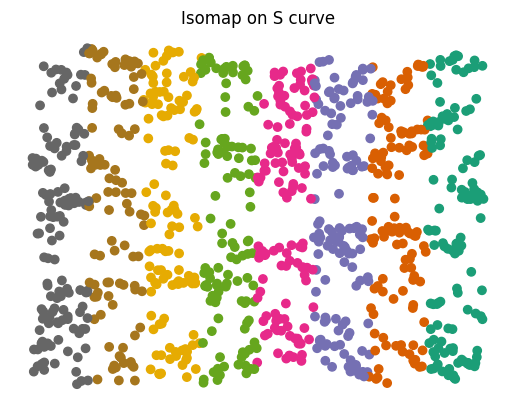

In [14]:
ax = fig.add_subplot(111)
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=color, cmap=plt.cm.Dark2)
plt.title("Isomap on S curve")
plt.axis('off')
plt.show()

In [15]:
from sklearn.manifold import Isomap

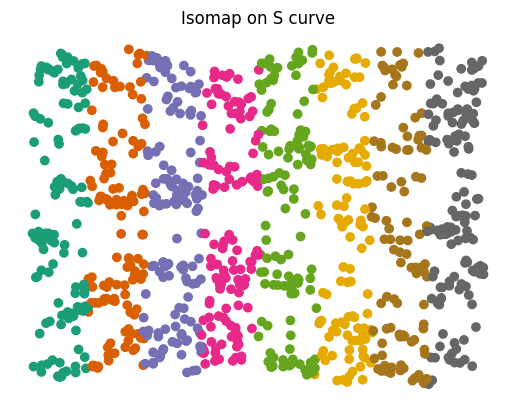

In [16]:
Y = Isomap(n_neighbors=10, n_components=2).fit_transform(X)

ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Dark2)
plt.title("Isomap on S curve")
plt.axis('off')
plt.show()

In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=200)
faces.data.shape

(766, 2914)

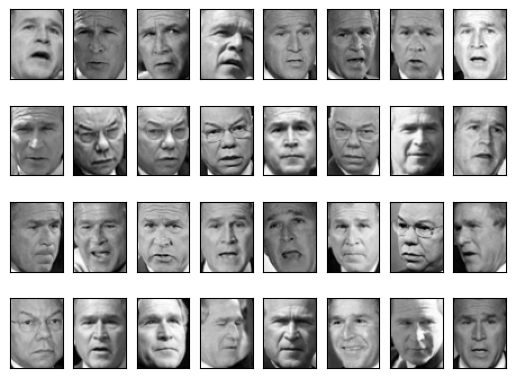

In [18]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

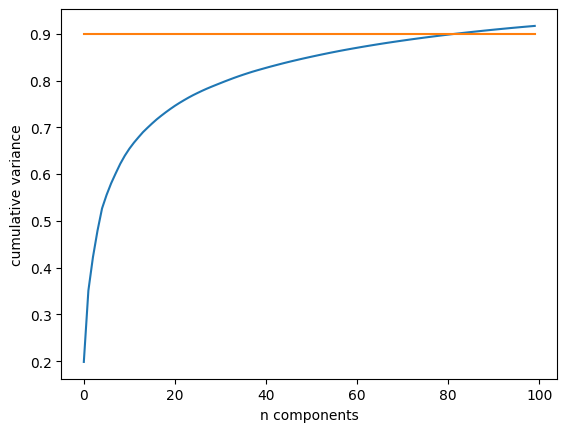

In [19]:
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')
plt.plot(range(100), 0.9*np.ones(100))

In [20]:
model = Isomap(n_components=2, n_neighbors = 5)
proj = model.fit_transform(faces.data)
proj.shape

(766, 2)

In [21]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):

    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

Text(0, 0.5, 'Image Darkness')

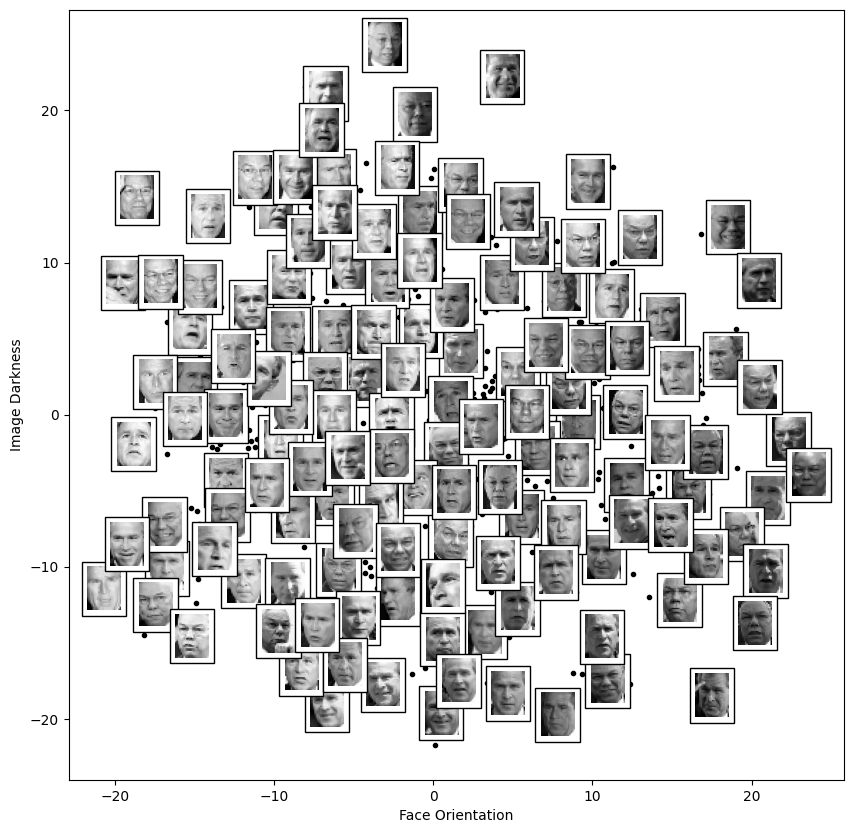

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2, n_neighbors = 5),
                images=faces.images[:, ::2, ::2])
plt.xlabel("Face Orientation")
plt.ylabel("Image Darkness")

## Exercises!!

1. How do you think would the number of neighbors effect the Isomap algorithm? What happens when the number of neighbors considered is very large? What happens when it is very low?

2. When is the ISOMAP algorithm superior to PCA?

3. Search up another manifold learning methods other than ISOMAP? If there are any, whats the key difference ?

4. Suggest ways to deal with missing data in manifold learning.

### Exercise 1

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-pa

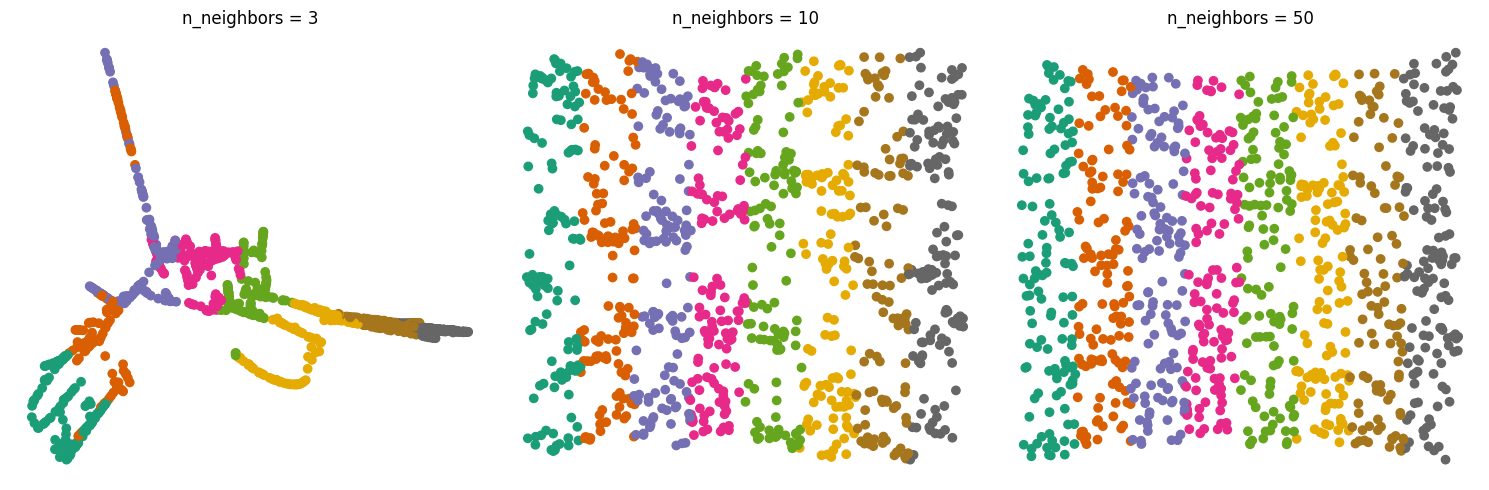

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

n_neighbors_values = [3, 10, 50] # Experiment with different numbers of neighbors

for i, n_neighbors in enumerate(n_neighbors_values):
    model = Isomap(n_neighbors=n_neighbors, n_components=2)
    Y = model.fit_transform(X)

    axes[i].scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Dark2)
    axes[i].set_title(f"n_neighbors = {n_neighbors}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Exercise 2

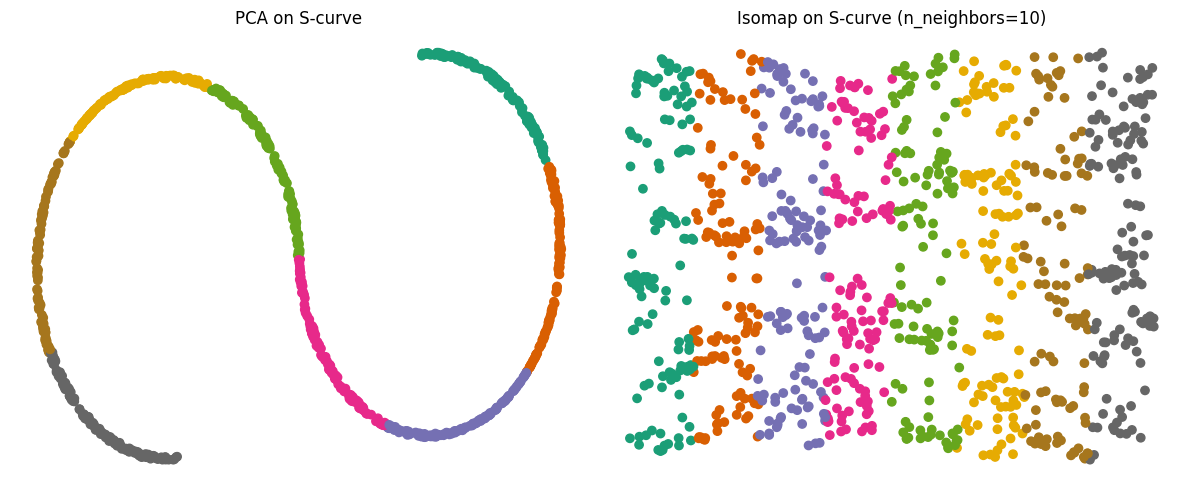

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Dark2)
axes[0].set_title("PCA on S-curve")
axes[0].axis('off')

axes[1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Dark2)
axes[1].set_title("Isomap on S-curve (n_neighbors=10)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

### Exercise 3

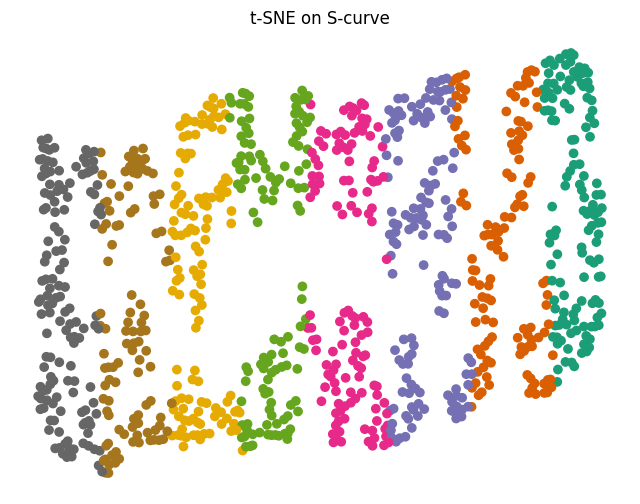

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Dark2)
plt.title("t-SNE on S-curve")
plt.axis('off')
plt.show()

### Exercise 4

Original data shape: (1000, 3)
Data with missing values shape: (1000, 3)
Number of missing values: 146
Data after imputation shape: (1000, 3)
Number of missing values after imputation: 0


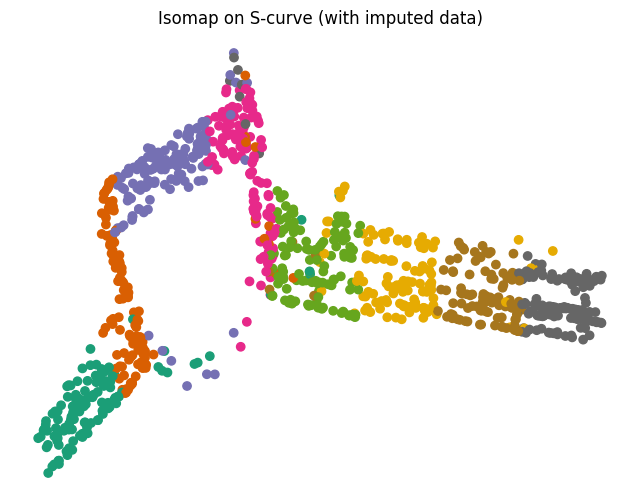

In [26]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

X_with_missing = X.copy()
np.random.seed(42)
n_samples, n_features = X_with_missing.shape
n_missing = int(0.05 * n_samples * n_features)
missing_rows = np.random.randint(0, n_samples, n_missing)
missing_cols = np.random.randint(0, n_features, n_missing)
X_with_missing[missing_rows, missing_cols] = np.nan

print("Original data shape:", X.shape)
print("Data with missing values shape:", X_with_missing.shape)
print("Number of missing values:", np.sum(np.isnan(X_with_missing)))

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X_with_missing)

print("Data after imputation shape:", X_imputed.shape)
print("Number of missing values after imputation:", np.sum(np.isnan(X_imputed)))

isomap_imputed = Isomap(n_neighbors=10, n_components=2)
Y_imputed = isomap_imputed.fit_transform(X_imputed)

plt.figure(figsize=(8, 6))
plt.scatter(Y_imputed[:, 0], Y_imputed[:, 1], c=color, cmap=plt.cm.Dark2)
plt.title("Isomap on S-curve (with imputed data)")
plt.axis('off')
plt.show()